In [5]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [6]:
data = "data/wholesale_customers.csv"
df = pd.read_csv(data,skiprows=13)

In [7]:
print(df.shape)
print(df.info())
display(df.head())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    int64 
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 27.6+ KB
None


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,Other,12669,9656,7561,214,2674,1338
1,2,Other,7057,9810,9568,1762,3293,1776
2,2,Other,6353,8808,7684,2405,3516,7844
3,1,Other,13265,1196,4221,6404,507,1788
4,2,Other,22615,5410,7198,3915,1777,5185


In [8]:
dfX = df[['Frozen', 'Detergents_Paper']]
display(dfX.head())

,Frozen,Detergents_Paper
0,214,2674
1,1762,3293
2,2405,3516
3,6404,507
4,3915,1777


In [9]:
X_scaled = scale(dfX)

In [10]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0, ddof=0))

[3.63345717e-17 2.42230478e-17]
[1. 1.]


In [11]:
print(type(X_scaled))
print(X_scaled[:5])

<class 'numpy.ndarray'>
[[-0.58936716 -0.04356873]
 [-0.27013618  0.08640684]
 [-0.13753572  0.13323164]
 [ 0.6871443  -0.49858822]
 [ 0.17385884 -0.23191782]]


In [12]:
dfX_scaled = pd.DataFrame(X_scaled, columns=dfX.columns)
display(dfX_scaled.head())

,Frozen,Detergents_Paper
0,-0.589367,-0.043569
1,-0.270136,0.086407
2,-0.137536,0.133232
3,0.687144,-0.498588
4,0.173859,-0.231918


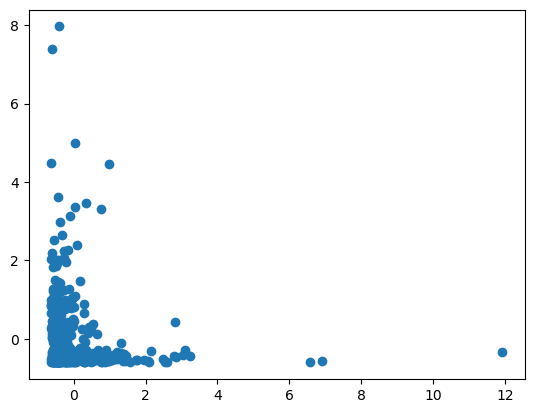

In [13]:
plt.scatter(dfX_scaled['Frozen'], dfX_scaled['Detergents_Paper'])

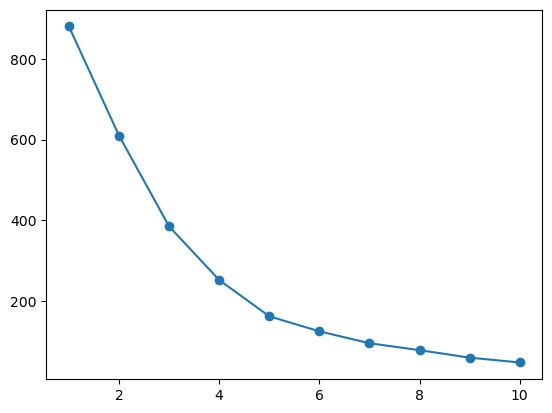

In [15]:
distortions = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans.fit(dfX_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(k_range, distortions, marker='o')

In [17]:
kmeans = KMeans(n_clusters=3, random_state=10, n_init=10)
cls = kmeans.fit_predict(dfX_scaled)
print(cls)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 1 0
 1 2 0 0 0 2 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 2 0 1 0 0]


In [18]:
df['cluster_no'] = cls
display(df.head())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,cluster_no
0,2,Other,12669,9656,7561,214,2674,1338,0
1,2,Other,7057,9810,9568,1762,3293,1776,0
2,2,Other,6353,8808,7684,2405,3516,7844,0
3,1,Other,13265,1196,4221,6404,507,1788,0
4,2,Other,22615,5410,7198,3915,1777,5185,0


In [23]:
cluster_counts = df["cluster_no"].value_counts()
print(cluster_counts)
print(cluster_counts.idxmax())
print(cluster_counts.max())

cluster_no
0    385
1     37
2     18
Name: count, dtype: int64
0
385


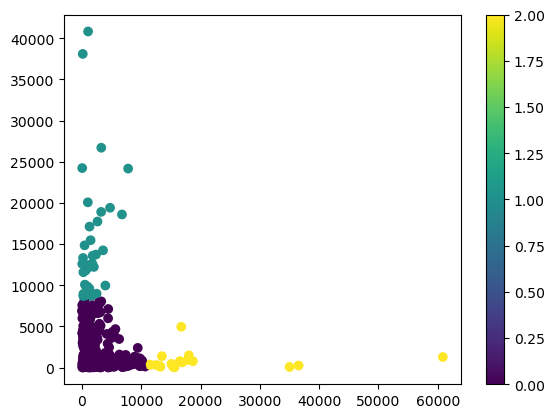

In [27]:
plt.scatter(df['Frozen'], df['Detergents_Paper'], c=df['cluster_no'])
plt.colorbar()

### 特徴

**クラスタ0: 高消費型顧客**
冷凍品と洗剤・紙類の両方で高い消費額を示す顧客群。比較的規模の大きな事業者や、多様な商品を大量購入する顧客と考えられる。

**クラスタ1: 標準型顧客**
冷凍品と洗剤・紙類の消費額がともに低く、最も多数を占める標準的な顧客群。一般的な小売店舗や小規模事業者が多く含まれると推測される。

**クラスタ2: 冷凍品特化型顧客**
冷凍品の消費額は高いが、洗剤・紙類の消費額は低い特殊な購買パターンを示す顧客群。冷凍食品を専門に扱う事業者や、特定の業態に特化した顧客と考えられる。

In [34]:
cluster_centers = kmeans.cluster_centers_
max_cluster_center = cluster_centers[cluster_counts.idxmax()]
print(max_cluster_center[0])
print(max_cluster_center[1])

-0.13588434006352665
-0.22659423363134537


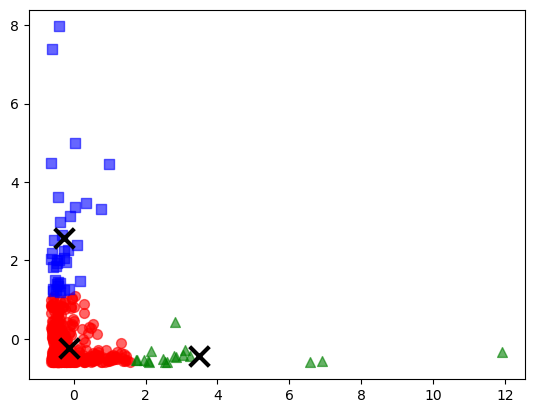

In [36]:
for i in range(3):
    colors = ['red', 'blue', 'green']
    markers = ['o', 's', '^']
    cluster_mask = df['cluster_no'] == i
    plt.scatter(dfX_scaled.loc[cluster_mask, 'Frozen'], 
                dfX_scaled.loc[cluster_mask, 'Detergents_Paper'],
                c=colors[i], marker=markers[i], alpha=0.6, 
                label=f'Cluster {i}', s=50)

for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c='black', marker='x', s=200, 
                linewidths=3, label=f'Center {i}' if i == 0 else "")